In [477]:
import pandas as pd
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [478]:
r0 = pd.read_csv('prices_round_2_day_-1.csv', sep=';')
r1 = pd.read_csv('prices_round_2_day_0.csv', sep=';')
r2 = pd.read_csv('prices_round_2_day_1.csv', sep=';')
df = [r0, r1, r2]

r0_TF = r0[["timestamp", "ORCHIDS", "TRANSPORT_FEES"]]
r1_TF = r1[["timestamp", "ORCHIDS", "TRANSPORT_FEES"]]
r2_TF = r2[["timestamp", "ORCHIDS", "TRANSPORT_FEES"]]
df_TF = [r0_TF, r1_TF, r2_TF]

r0_ET = r0[["timestamp", "ORCHIDS", "EXPORT_TARIFF"]]
r1_ET = r1[["timestamp", "ORCHIDS", "EXPORT_TARIFF"]]
r2_ET = r2[["timestamp", "ORCHIDS", "EXPORT_TARIFF"]]
df_ET = [r0_ET, r1_ET, r2_ET]

r0_IT = r0[["timestamp", "ORCHIDS", "IMPORT_TARIFF"]]
r1_IT = r1[["timestamp", "ORCHIDS", "IMPORT_TARIFF"]]
r2_IT = r2[["timestamp", "ORCHIDS", "IMPORT_TARIFF"]]
df_IT = [r0_IT, r1_IT, r2_IT]

r0_SUN = r0[["timestamp", "ORCHIDS", "SUNLIGHT"]]
r1_SUN = r1[["timestamp", "ORCHIDS", "SUNLIGHT"]]
r2_SUN = r2[["timestamp", "ORCHIDS", "SUNLIGHT"]]
df_SUN = [r0_SUN, r1_SUN, r2_SUN]

r0_HUM = r0[["timestamp", "ORCHIDS", "HUMIDITY"]]
r1_HUM = r1[["timestamp", "ORCHIDS", "HUMIDITY"]]
r2_HUM = r2[["timestamp", "ORCHIDS", "HUMIDITY"]]
df_HUM = [r0_HUM, r1_HUM, r2_HUM]

**PLOT TRANSPORT FEES**

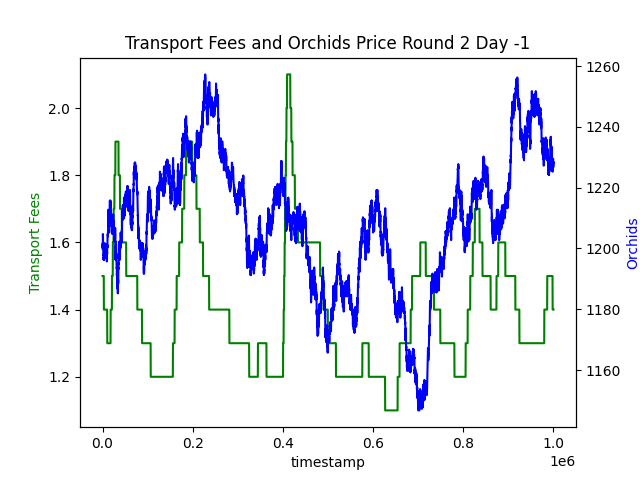

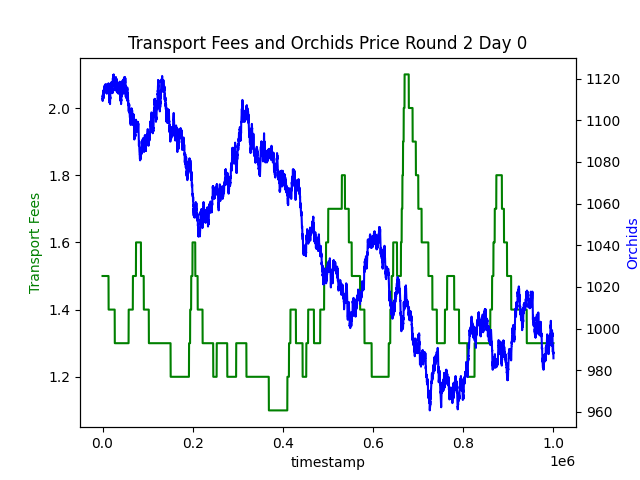

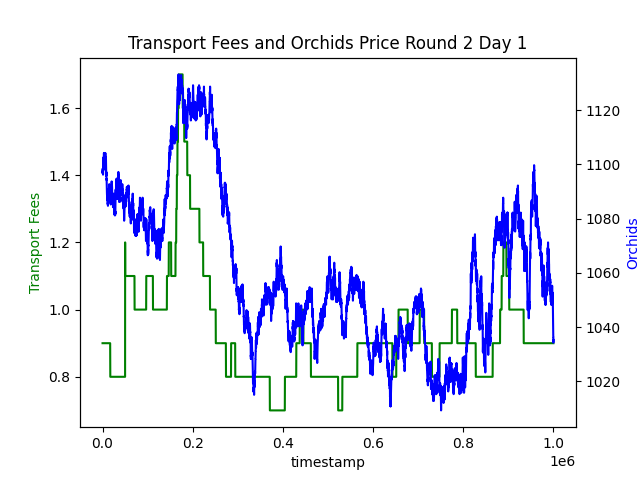

In [479]:
# plot transport fees and orchid's price on the same plot with two different scales
for i in range(3):
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.plot(df_TF[i]["timestamp"], df_TF[i]["TRANSPORT_FEES"], 'g-')
    ax2.plot(df_TF[i]["timestamp"], df_TF[i]["ORCHIDS"], 'b-')

    ax1.set_xlabel('timestamp')
    ax1.set_ylabel('Transport Fees', color='g')
    ax2.set_ylabel('Orchids', color='b')
    plt.title('Transport Fees and Orchids Price Round 2 Day ' + str(i-1))
    plt.show()


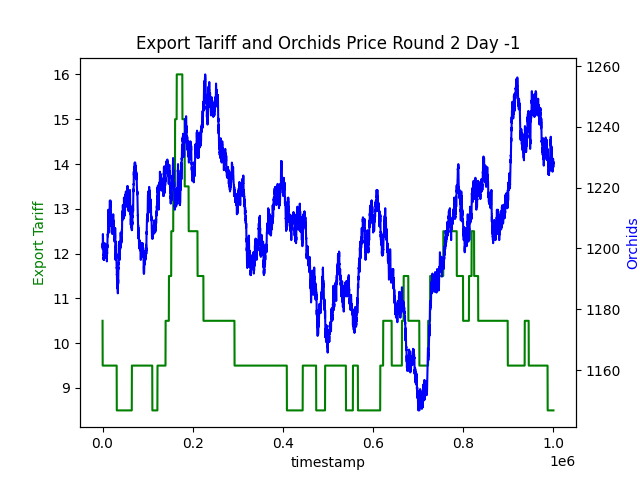

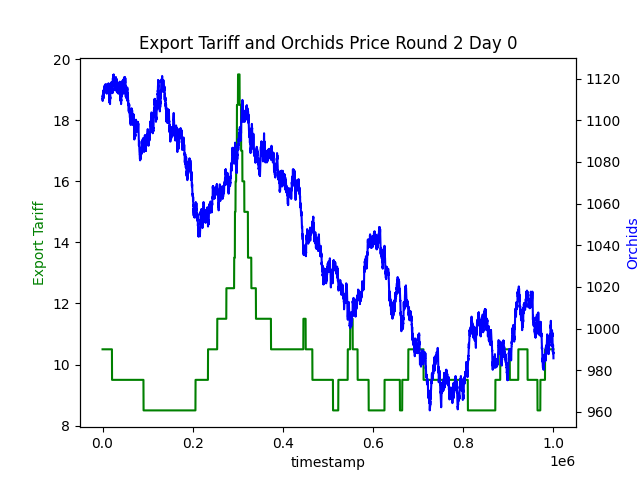

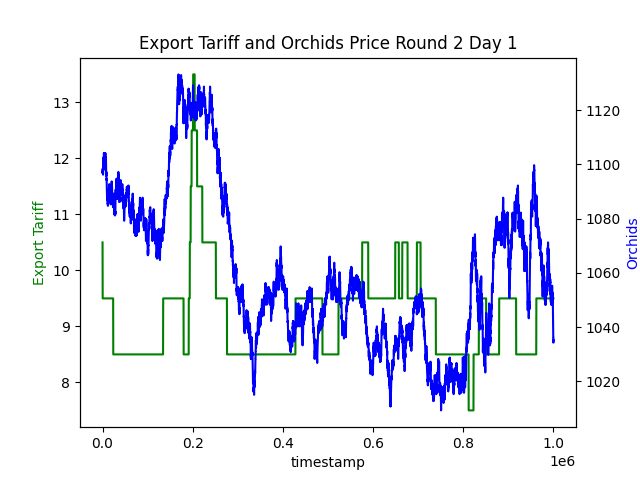

In [480]:
# plot export tarrif and orchid's price on the same plot with two different scales
for i in range(3):
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.plot(df_ET[i]["timestamp"], df_ET[i]["EXPORT_TARIFF"], 'g-')
    ax2.plot(df_ET[i]["timestamp"], df_ET[i]["ORCHIDS"], 'b-')

    ax1.set_xlabel('timestamp')
    ax1.set_ylabel('Export Tariff', color='g')
    ax2.set_ylabel('Orchids', color='b')
    plt.title('Export Tariff and Orchids Price Round 2 Day ' + str(i-1))
    plt.show()

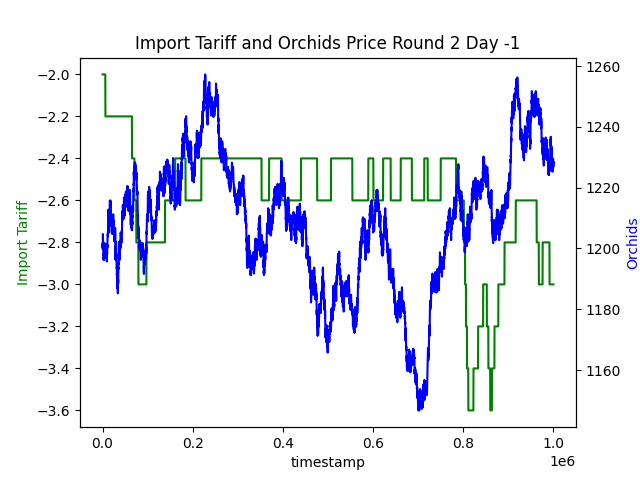

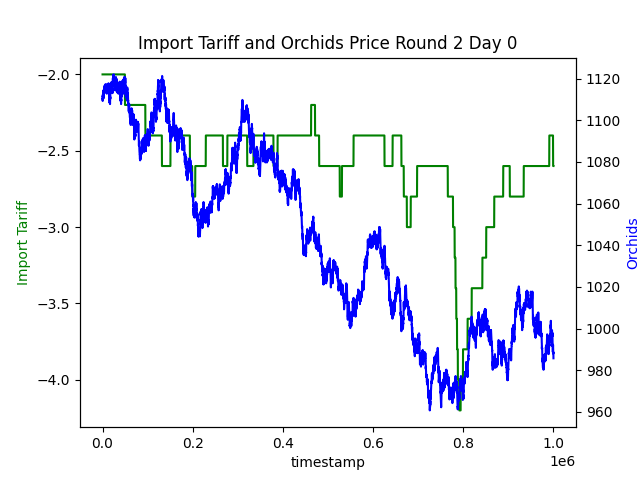

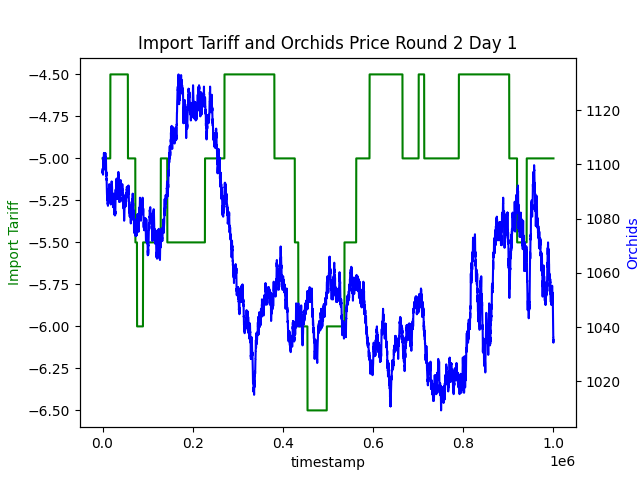

In [481]:
# plot import tarrif and orchid's price on the same plot with two different scales
for i in range(3):
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.plot(df_IT[i]["timestamp"], df_IT[i]["IMPORT_TARIFF"], 'g-')
    ax2.plot(df_IT[i]["timestamp"], df_IT[i]["ORCHIDS"], 'b-')

    ax1.set_xlabel('timestamp')
    ax1.set_ylabel('Import Tariff', color='g')
    ax2.set_ylabel('Orchids', color='b')
    plt.title('Import Tariff and Orchids Price Round 2 Day ' + str(i-1))
    plt.show()

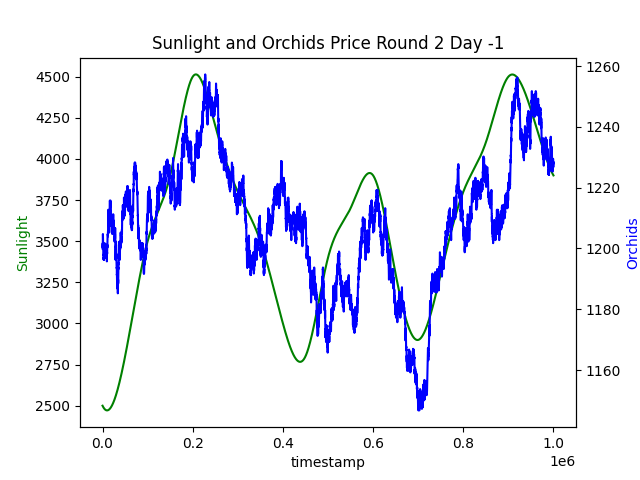

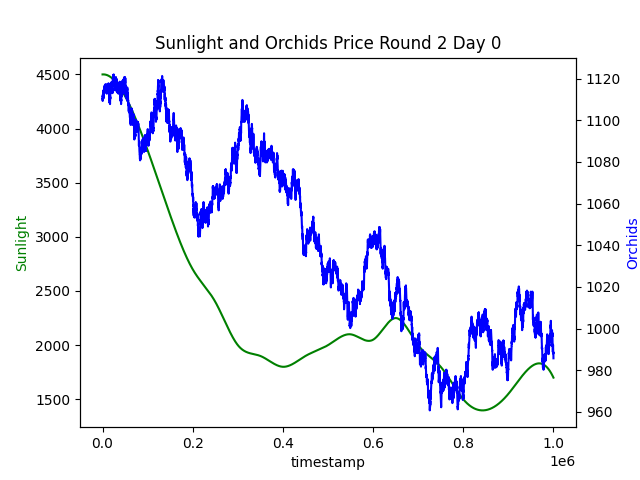

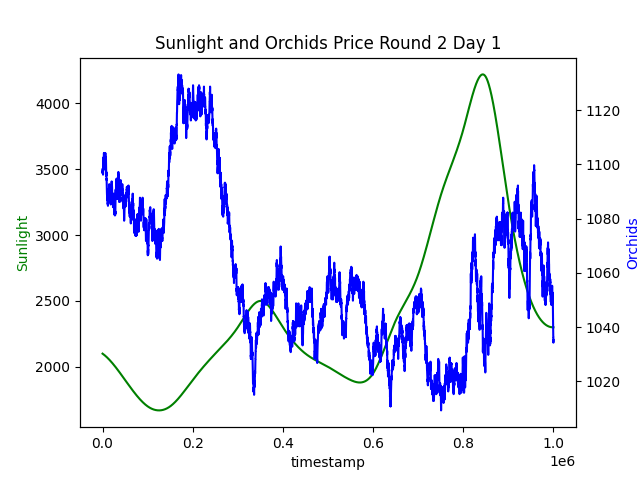

In [482]:
# plot sunlight and orchid's price on the same plot with two different scales
for i in range(3):
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.plot(df_SUN[i]["timestamp"], df_SUN[i]["SUNLIGHT"], 'g-')
    ax2.plot(df_SUN[i]["timestamp"], df_SUN[i]["ORCHIDS"], 'b-')

    ax1.set_xlabel('timestamp')
    ax1.set_ylabel('Sunlight', color='g')
    ax2.set_ylabel('Orchids', color='b')
    plt.title('Sunlight and Orchids Price Round 2 Day ' + str(i-1))
    plt.show()

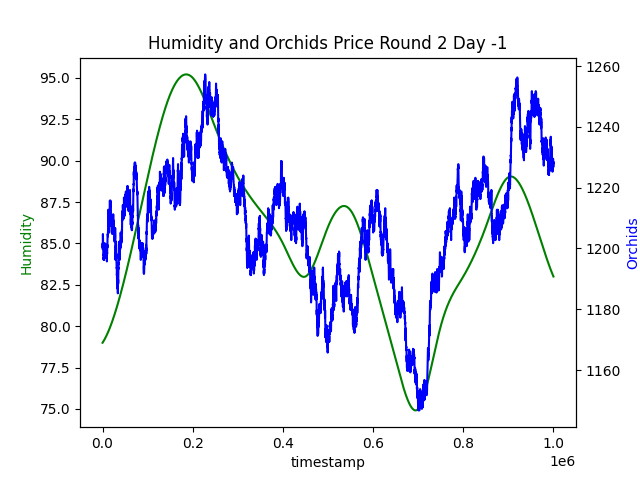

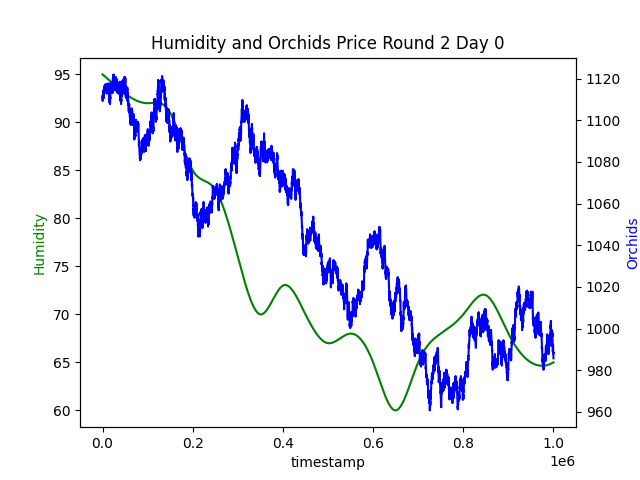

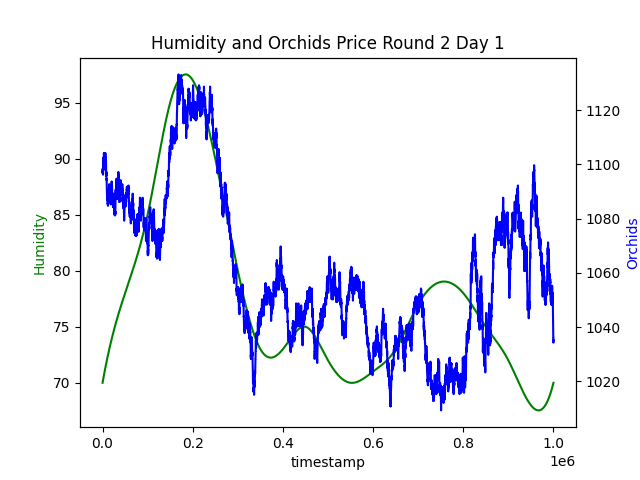

In [483]:
# plot humidity and orchid's price on the same plot with two different scales
for i in range(3):
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.plot(df_HUM[i]["timestamp"], df_HUM[i]["HUMIDITY"], 'g-')
    ax2.plot(df_HUM[i]["timestamp"], df_HUM[i]["ORCHIDS"], 'b-')

    ax1.set_xlabel('timestamp')
    ax1.set_ylabel('Humidity', color='g')
    ax2.set_ylabel('Orchids', color='b')
    plt.title('Humidity and Orchids Price Round 2 Day ' + str(i-1))
    plt.show()

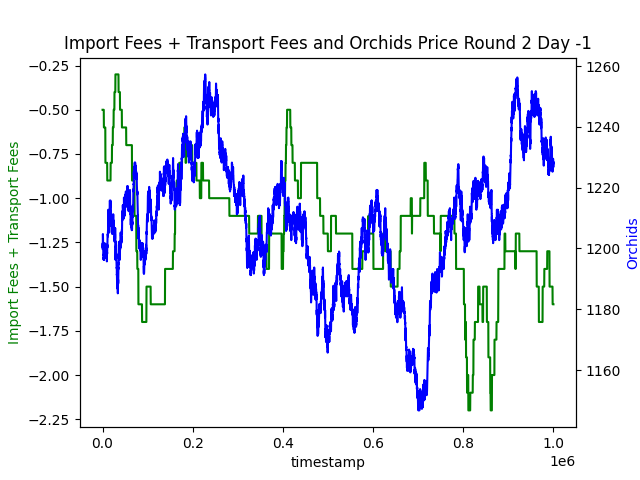

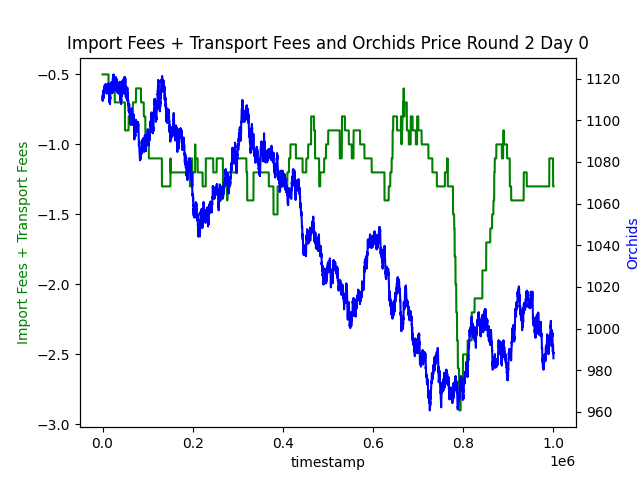

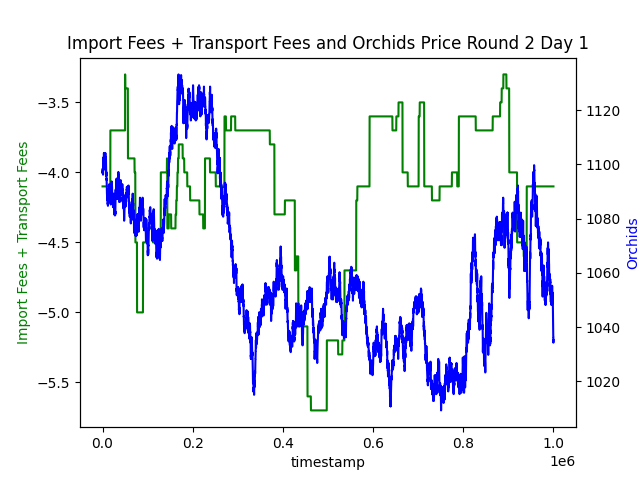

In [484]:
# plot import fees + transport fees and orchid's price on the same plot with two different scales
for i in range(3):
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.plot(df_TF[i]["timestamp"], df_TF[i]["TRANSPORT_FEES"] + df_IT[i]["IMPORT_TARIFF"], 'g-')
    ax2.plot(df_TF[i]["timestamp"], df_TF[i]["ORCHIDS"], 'b-')

    ax1.set_xlabel('timestamp')
    ax1.set_ylabel('Import Fees + Transport Fees', color='g')
    ax2.set_ylabel('Orchids', color='b')
    plt.title('Import Fees + Transport Fees and Orchids Price Round 2 Day ' + str(i-1))
    plt.show()

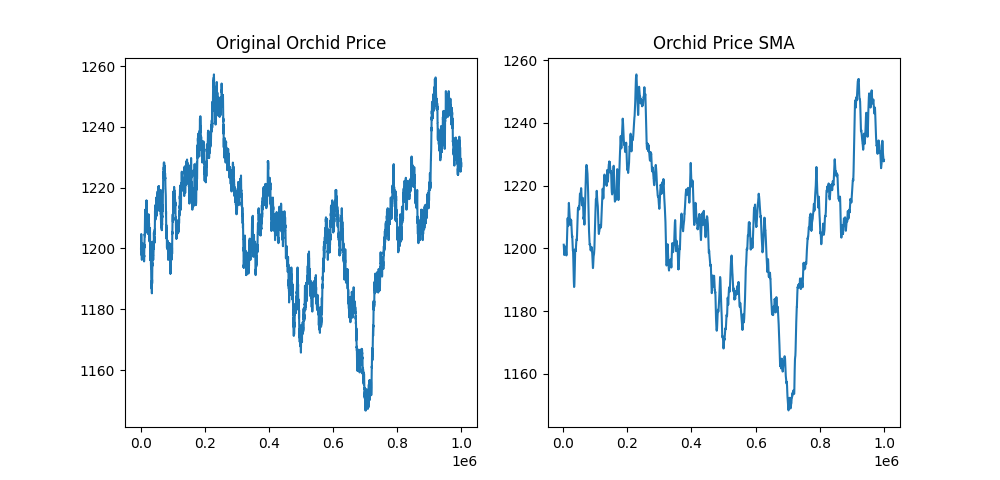

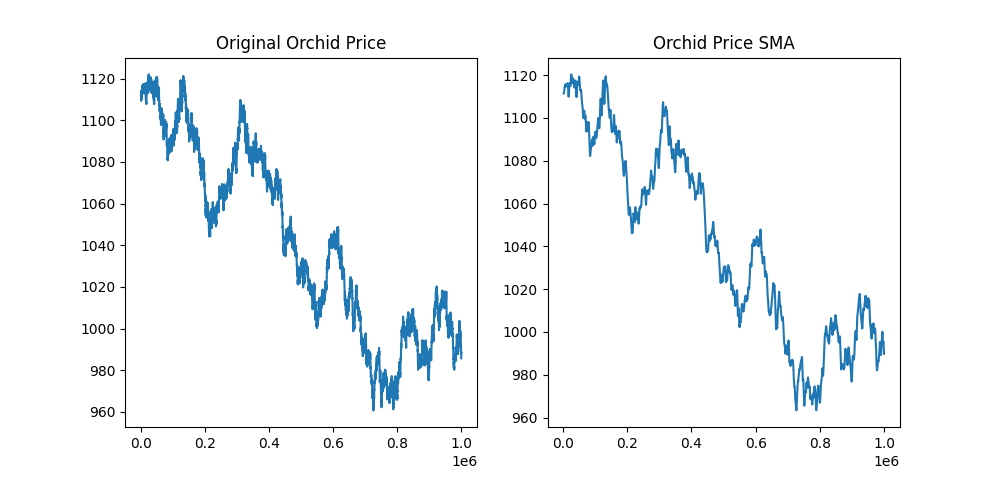

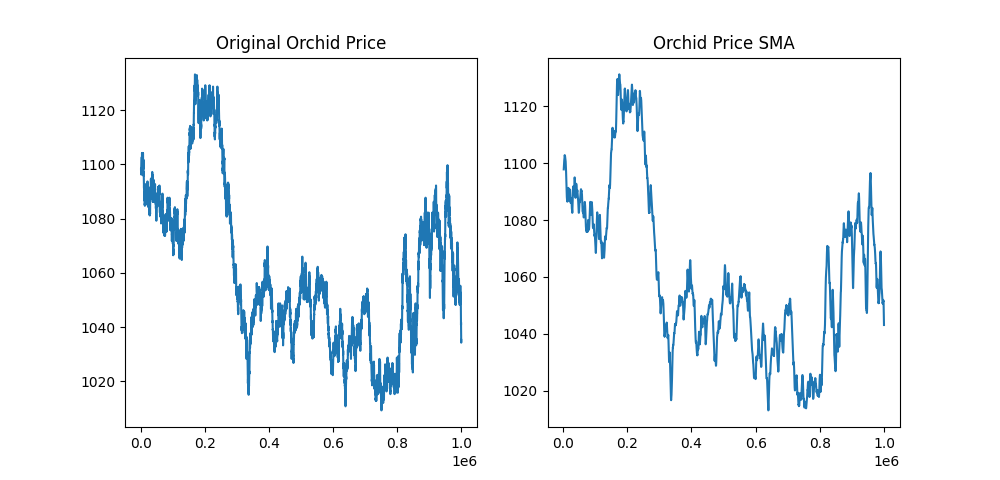

In [485]:
# implement an SMA filter for 10 last timestamp to smooth the data
for i in range(3):
    df[i]["ORCHID_SMA"] = df[i]["ORCHIDS"].rolling(window=20).mean()

# plot the EMA one and the original orchid's price on two plots next to each other
for i in range(3):
    fig, axs = plt.subplots(1, 2)
    # set to fix the full page width
    fig.set_figwidth(10)
    axs[0].plot(df[i]["timestamp"], df[i]["ORCHIDS"])
    axs[0].set_title('Original Orchid Price')
    axs[1].plot(df[i]["timestamp"], df[i]["ORCHID_SMA"])
    axs[1].set_title('Orchid Price SMA')
    plt.show()

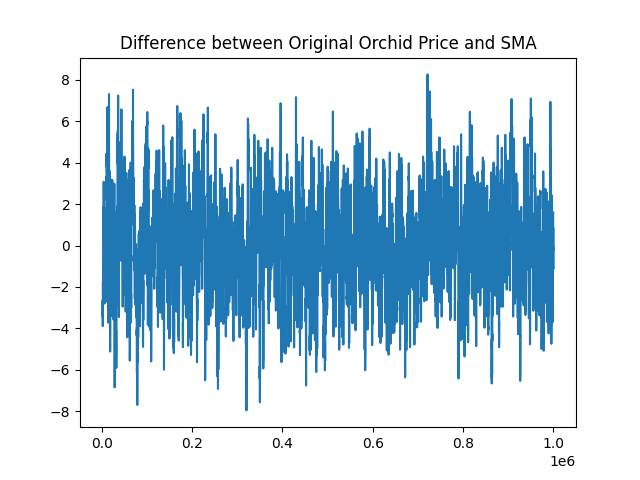

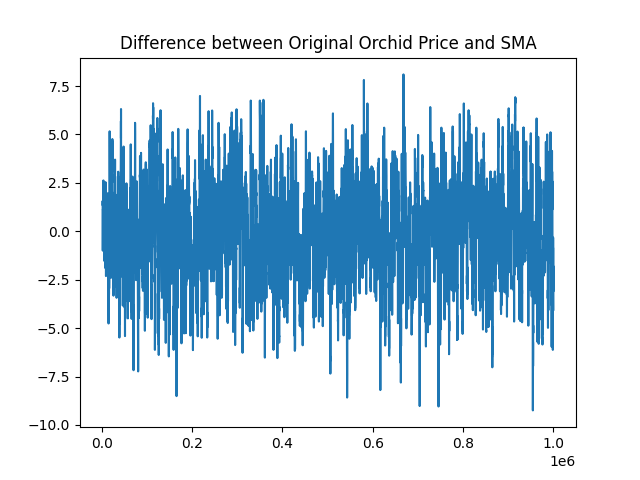

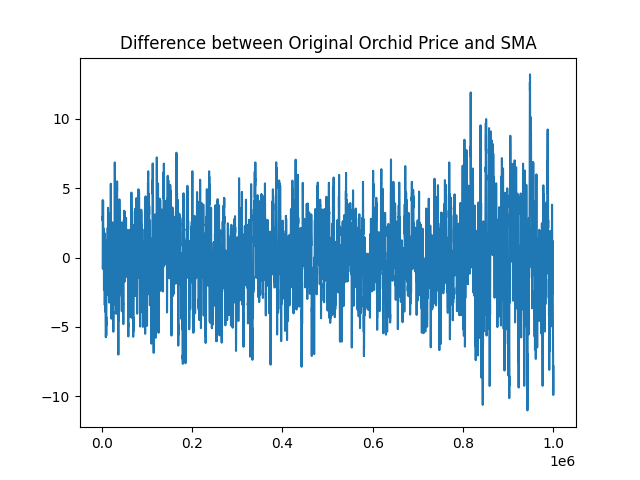

In [486]:
# plot the difference of the original orchid's price and the EMA
for i in range(3):
    fig, ax = plt.subplots()
    ax.plot(df[i]["timestamp"], df[i]["ORCHIDS"] - df[i]["ORCHID_SMA"])
    ax.set_title('Difference between Original Orchid Price and SMA')
    plt.show()

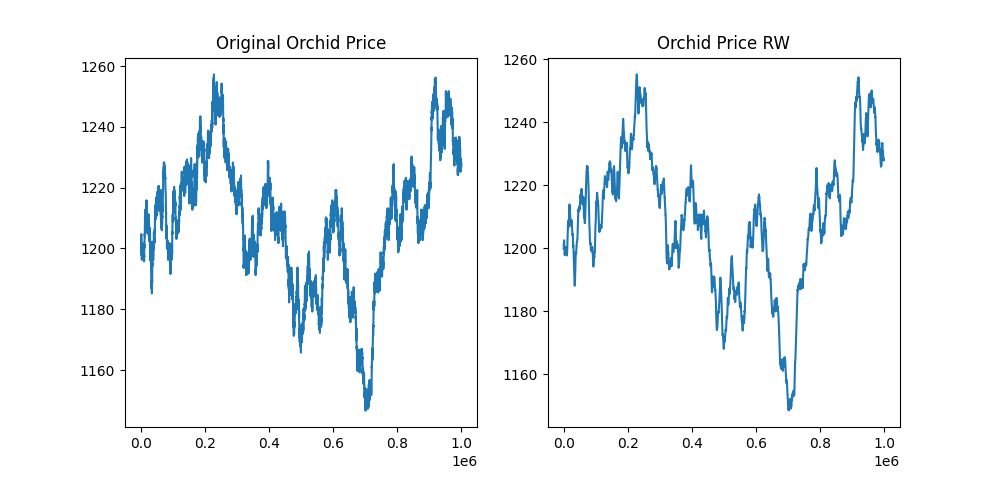

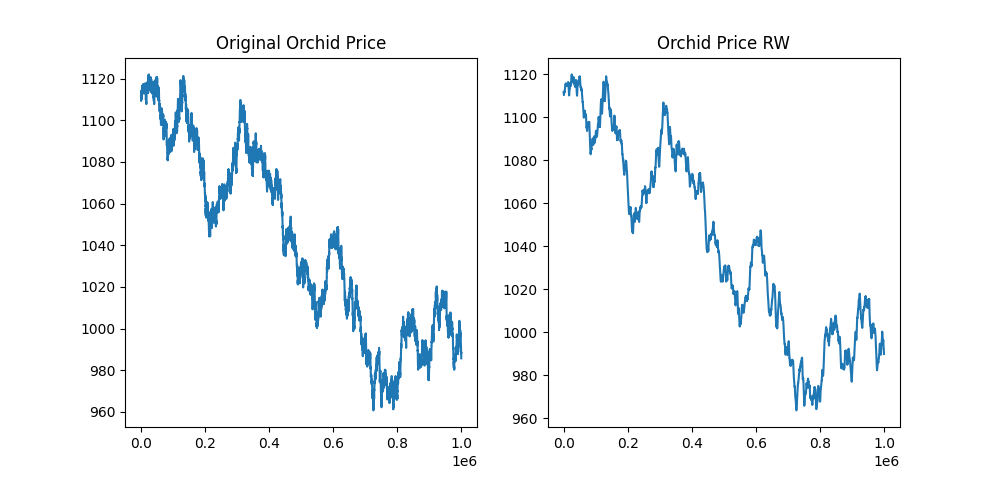

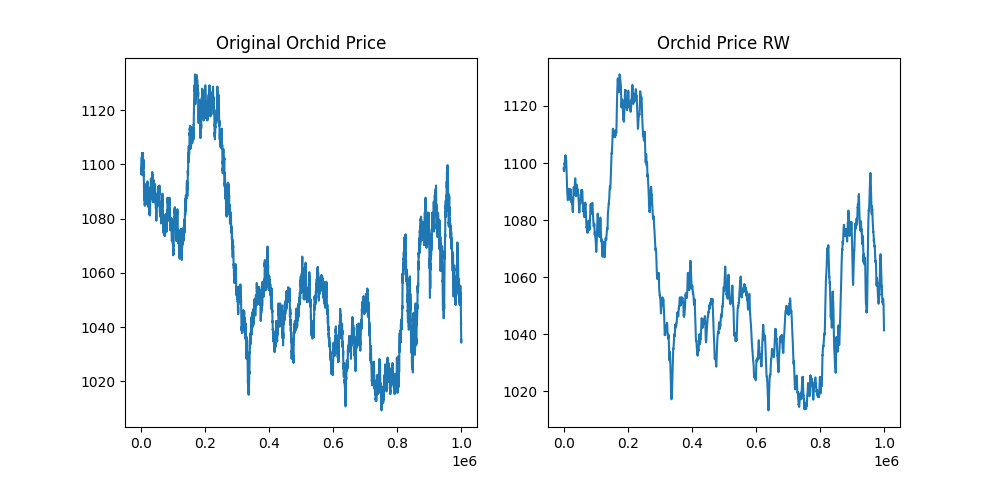

In [487]:
# implement Random Walk model to smooth the data
for i in range(3):
    df[i]["ORCHID_RW"] = df[i]["ORCHIDS"].ewm(alpha=0.1).mean()

# plot the Random Walk one and the original orchid's price on two plots next to each other
for i in range(3):
    fig, axs = plt.subplots(1, 2)
    # set to fix the full page width
    fig.set_figwidth(10)
    axs[0].plot(df[i]["timestamp"], df[i]["ORCHIDS"])
    axs[0].set_title('Original Orchid Price')
    axs[1].plot(df[i]["timestamp"], df[i]["ORCHID_RW"])
    axs[1].set_title('Orchid Price RW')
    plt.show()

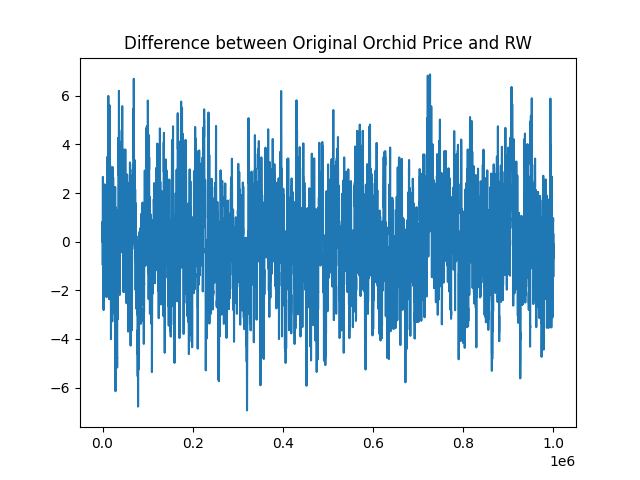

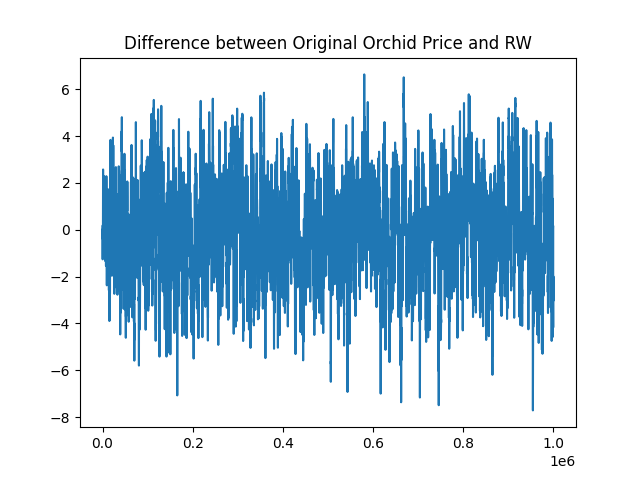

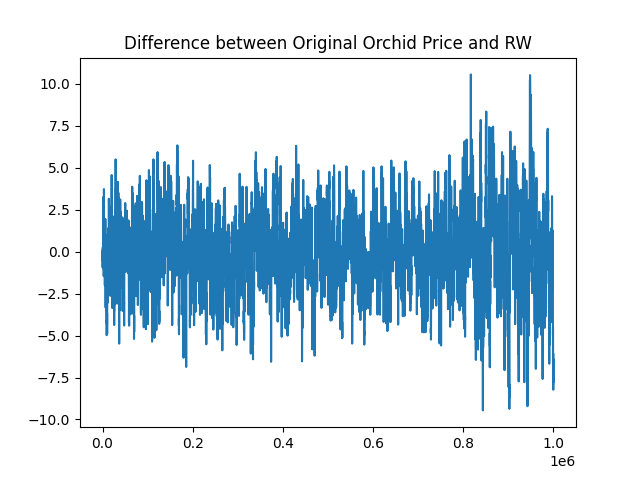

In [488]:
# plot the difference of the original orchid's price and the Random Walk
for i in range(3):
    fig, ax = plt.subplots()
    ax.plot(df[i]["timestamp"], df[i]["ORCHIDS"] - df[i]["ORCHID_RW"])
    ax.set_title('Difference between Original Orchid Price and RW')
    plt.show()

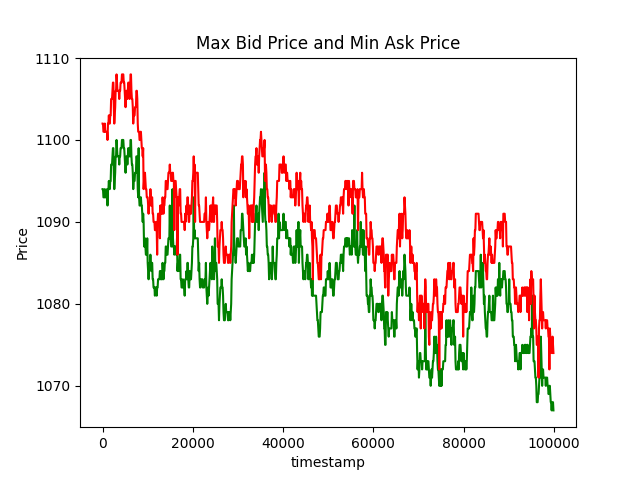

In [489]:
df_bid = pd.read_csv('bids.csv', sep=';')

# remove the whitespace in the column names
df_bid.columns = df_bid.columns.str.strip()

# remove the whitespace in all of the columns
df_bid = df_bid.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# set the bid and ask prices to int, make sure you set the '' to NaN
df_bid['bid_price_1'] = pd.to_numeric(df_bid['bid_price_1'], errors='coerce')
df_bid['bid_price_2'] = pd.to_numeric(df_bid['bid_price_2'], errors='coerce')
df_bid['bid_price_3'] = pd.to_numeric(df_bid['bid_price_3'], errors='coerce')
df_bid['ask_price_1'] = pd.to_numeric(df_bid['ask_price_1'], errors='coerce')
df_bid['ask_price_2'] = pd.to_numeric(df_bid['ask_price_2'], errors='coerce')
df_bid['ask_price_3'] = pd.to_numeric(df_bid['ask_price_3'], errors='coerce')

# filter df on where product is ORCHIDS
df_bid = df_bid[df_bid['product'] == 'ORCHIDS']

# plot the max(bid_price_1, bid_price_2 and bid_price_3), and min(ask_price_1, ask_price_2 and ask_price_3) with different colors on the same plot
fig, ax = plt.subplots()
ax.plot(df_bid["timestamp"], df_bid[["bid_price_1", "bid_price_2", "bid_price_3"]].max(axis=1), 'g-')
ax.plot(df_bid["timestamp"], df_bid[["ask_price_1", "ask_price_2", "ask_price_3"]].min(axis=1), 'r-')
ax.set_xlabel('timestamp')
ax.set_ylabel('Price')
plt.title('Max Bid Price and Min Ask Price')
plt.show()

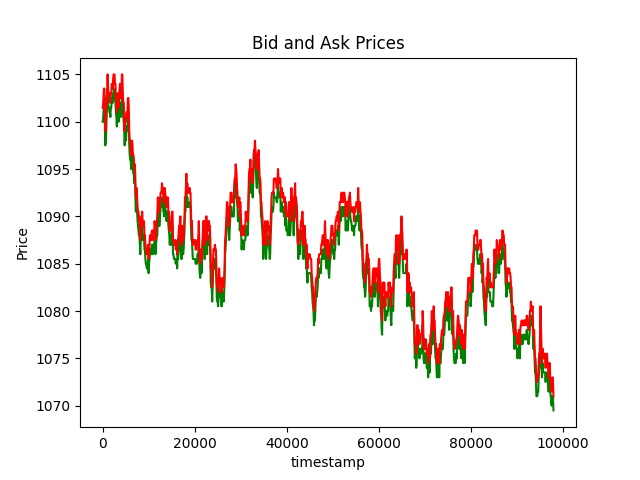

In [490]:
# read the data from logs.log file
with open('logs.log', 'r') as f:
    logs = f.readlines()

lambdalog = []
for log in logs:
    if "lambdaLog" in log:
        lambdalog.append(log)

bid_prices = []
ask_prices = []
timestamps = []

for log in lambdalog:
    if not "Bid Price" in log:
        continue
    bid_prices.append(float(log[68:74]))
    ask_prices.append(float(log[88:94]))

timestamplog = []
for log in logs:
    if log == '\n':
        break
    if "timestamp" in log:
        timestamplog.append(log)
    
for log in timestamplog:
    timestamps.append(int(log[15:-1]))

# Create a data frame from timestamp, bid_prices and ask_prices
df_lambda = pd.DataFrame(list(zip(timestamps, bid_prices, ask_prices)), columns =['timestamp', 'bid_prices', 'ask_prices'])

# plot the bid_prices and ask_prices on the same plot
fig, ax = plt.subplots()
ax.plot(df_lambda["timestamp"], df_lambda["bid_prices"], 'g-')
ax.plot(df_lambda["timestamp"], df_lambda["ask_prices"], 'r-')
ax.set_xlabel('timestamp')
ax.set_ylabel('Price')
plt.title('Bid and Ask Prices')
plt.show()

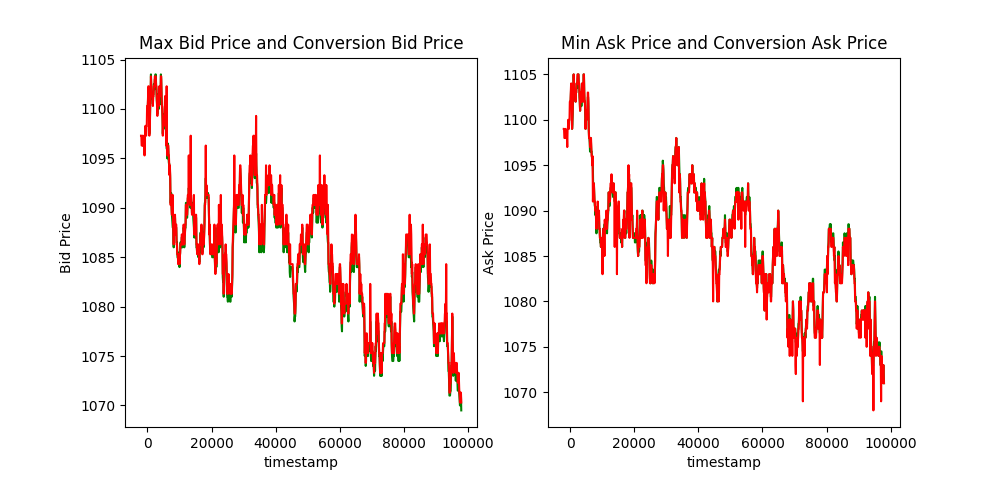

In [491]:
# shift the df_bid timestamp by 100
df_bid["timestamp"] = df_bid["timestamp"] - 2000

bid_diff = 3.3

ask_diff = 3

# shift up the df_bid bid_prices by 5
df_bid["bid_price_1"] = df_bid["bid_price_1"] + bid_diff
df_bid["bid_price_2"] = df_bid["bid_price_2"] + bid_diff
df_bid["bid_price_3"] = df_bid["bid_price_3"] + bid_diff

# shift down the df_bid ask_prices by 5
df_bid["ask_price_1"] = df_bid["ask_price_1"] - ask_diff
df_bid["ask_price_2"] = df_bid["ask_price_2"] - ask_diff
df_bid["ask_price_3"] = df_bid["ask_price_3"] - ask_diff

# plot the two below next to each other
fig, axs = plt.subplots(1, 2)
# set to fix the full page width
fig.set_figwidth(10)
axs[0].plot(df_lambda["timestamp"], df_lambda["bid_prices"], 'g-')
axs[0].plot(df_bid["timestamp"], df_bid[["bid_price_1", "bid_price_2", "bid_price_3"]].max(axis=1), 'r-')
axs[0].set_xlabel('timestamp')
axs[0].set_ylabel('Bid Price')
axs[0].set_title('Max Bid Price and Conversion Bid Price')

axs[1].plot(df_lambda["timestamp"], df_lambda["ask_prices"], 'g-')
axs[1].plot(df_bid["timestamp"], df_bid[["ask_price_1", "ask_price_2", "ask_price_3"]].min(axis=1), 'r-')
axs[1].set_xlabel('timestamp')
axs[1].set_ylabel('Ask Price')
axs[1].set_title('Min Ask Price and Conversion Ask Price')
plt.show()
